In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
import plotly.graph_objects as go
import plotly.express as px

import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import gmaps
# Import the API key.
from config import g_key

# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

# Extract: Reading the Data

In [3]:
# Read your CSV file
file_to_load = '../dataset/vehicles.csv'

In [4]:
# Convert the file into a pandas DataFrame and analyze the first 5 values
used_cars = pd.read_csv(file_to_load)
used_cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
# Analyze the last 5 values
used_cars.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [6]:
used_cars.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

<AxesSubplot:>

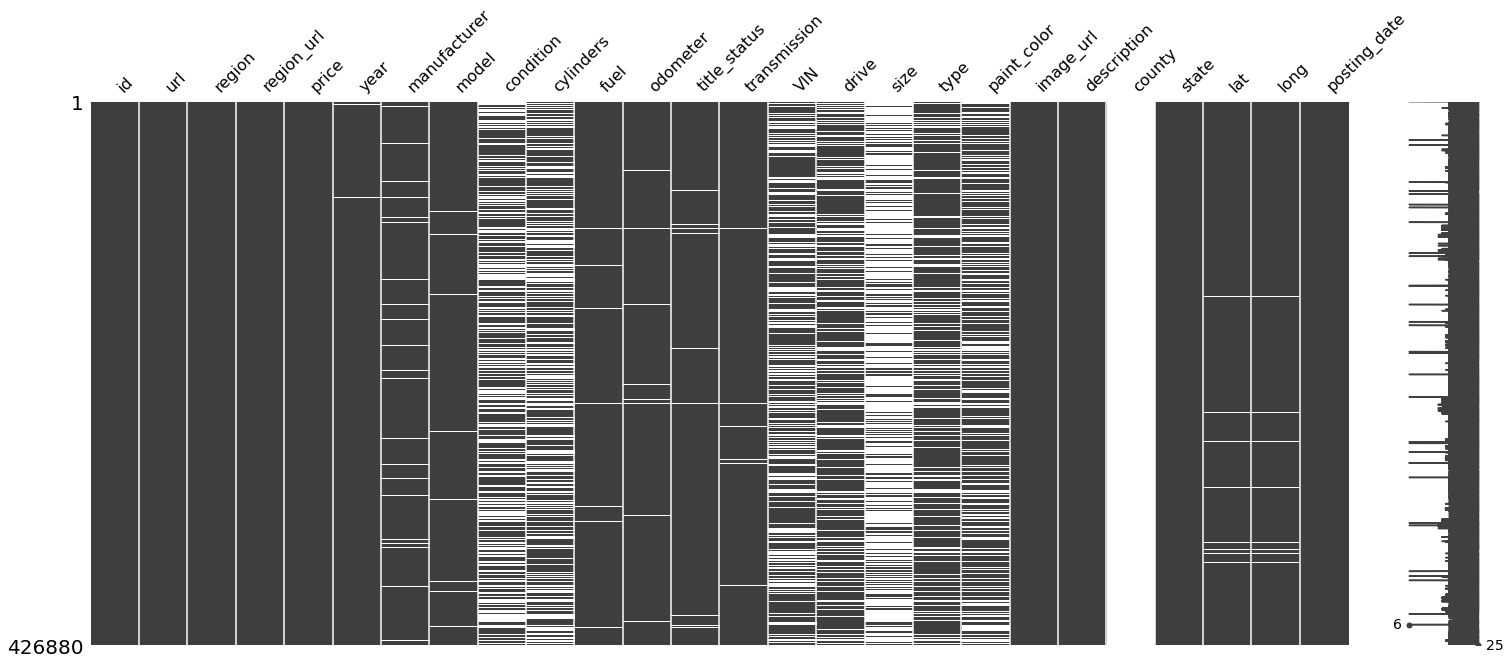

In [7]:
msng.matrix(used_cars)

Visualizing the dataset this way we can make multiple observations for our **Transform** step:
1. The clearest one would be that the first step is dropping the "county" column given that it doesn't have any data, therefore doesn't provide any value.
2. The next columns that we need to explore considering data quality are:
    - condition
    - cylinders
    - VIN
    - size
3. We can keep the id column, not for Data Analysis purposes, but to be able to, in case is neccesary, locate a vehicle we would like to inspect into detail and this way, we are going to be able to drop unneccesary columns for the analysis:
    - url
    - region_url
    - image_url
    - description
    - VIN

# Transform: Data Cleaning

First, let's take care of the columns that serve no purpose for our analysis:

In [8]:
used_cars_df = used_cars.drop(columns = ['url', 'region_url', 'image_url', 'VIN', 'county', 'size', 'description'])

Now, to consolidate our data further, the main variables that we want to analyze with NaNs are:
- Year
- Condition
- Model
- Manufacturer

Therefore, for data cleaning, the strategy chosen is to drop any null values within those columns.

In [9]:
used_cars_df_nonull = used_cars_df.dropna(subset = ['year', 'condition', 'model', 'manufacturer'])

Exploring our data once more, we now see that our DataFrame has way fewer missing points thay could affect our statistics, correlations and metrics.

<AxesSubplot:>

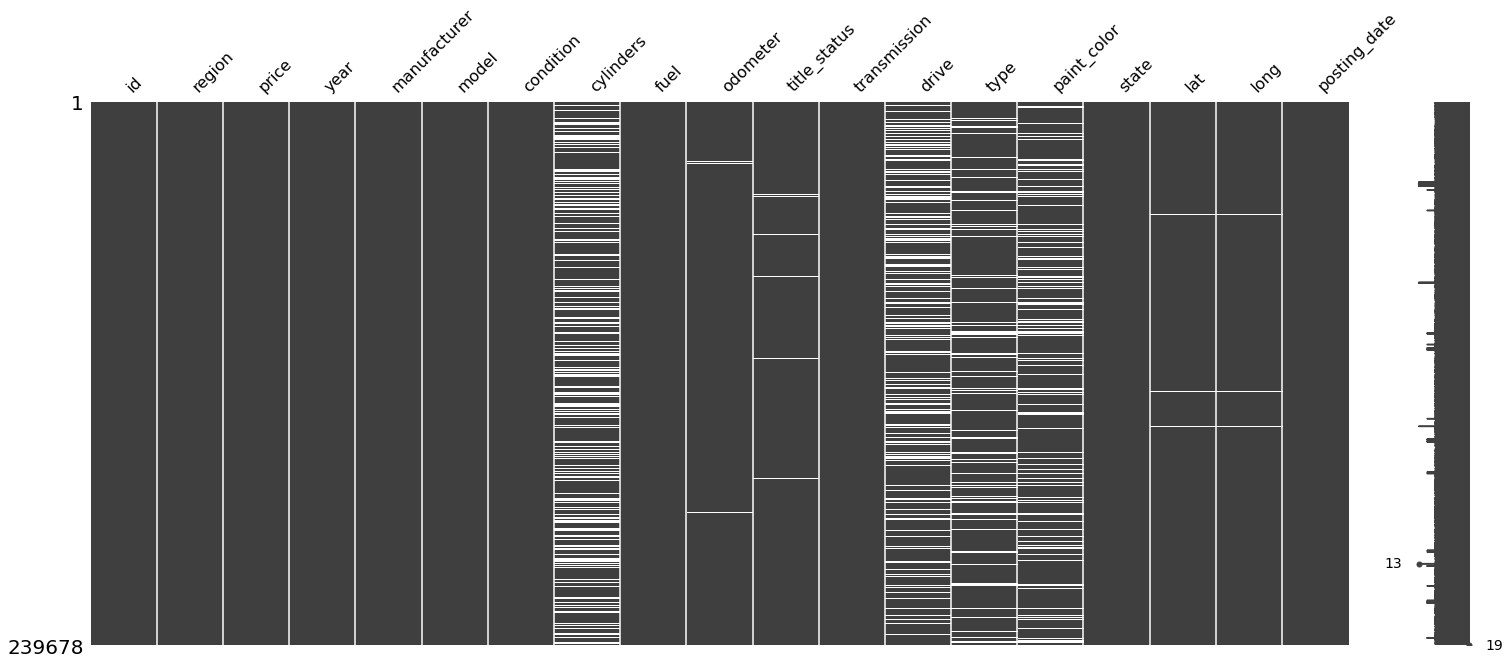

In [10]:
msng.matrix(used_cars_df_nonull)

In [11]:
used_cars_df_nonull.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500


Now, for manufacturers, we need to confirm that there are no similar names that are not grouped correctly.

In [12]:
used_cars_df_nonull['manufacturer'].value_counts()

ford               37467
chevrolet          32148
toyota             20490
honda              12841
nissan             11020
jeep               10442
gmc                 9373
bmw                 9146
ram                 7994
dodge               7563
mercedes-benz       6685
volkswagen          6241
hyundai             6009
subaru              5536
lexus               5289
audi                5231
kia                 4928
cadillac            4490
acura               4479
chrysler            3643
buick               3633
mazda               3603
infiniti            3543
lincoln             3047
volvo               2459
mitsubishi          2321
mini                1594
jaguar              1550
pontiac             1468
rover               1049
mercury              824
alfa-romeo           751
porsche              728
saturn               686
tesla                667
fiat                 564
harley-davidson       74
ferrari               40
datsun                40
aston-martin          12


After having a clean DataFrame, we then have to remove the outliers using the standard deviation method defining a function to avoid repetition.

In [13]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [14]:
columns = {'price', 'year', 'odometer'}

In [15]:
remove_outliers(used_cars_df_nonull, columns, 2)

Working on column: price
Working on column: odometer
Working on column: year


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


To finalize our Data Cleaning, we are going to add a column named **years** to the Dataframe to be able to evaluate depreciation.

In [38]:
used_cars_df_nonull['age'] = 2020 - used_cars_df_nonull['year']

C:\Users\c_hum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Identifying Correlated variables

To define the variables that we should focus on, lets plot the correlation coefficient between the parameters shared by all datapoint:
- Price
- Age
- Mileage (Odometer)

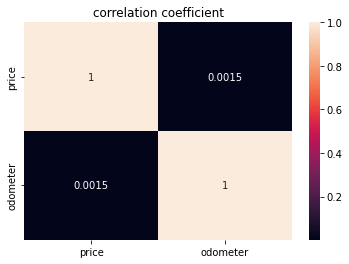

In [17]:
variables = ["price", "odometer"]
sns.heatmap(used_cars_df_nonull[variables].corr(), annot = True)
plt.title('correlation coefficient')
plt.show()

# Manufacturer Exploratory Data Analysis

We are going to be analyzing our data based on different variables to visualize the distribution of our data, the most commonly sold cars by manufacturer and by model. As we previously saw the Manufacturer that are most commonly adverstised in Craigslist are:

In [18]:
top_manufacturers_df = used_cars_df_nonull['manufacturer'].value_counts().to_frame()
top_manufacturers_df.head(12)

,manufacturer
ford,37467
chevrolet,32148
toyota,20490
honda,12841
nissan,11020
jeep,10442
gmc,9373
bmw,9146
ram,7994
dodge,7563


We are going to be focusing on this top manufacturers and adding **Audi**, **KIA**, and **Chrysler** taking in cosideration some popular Manufacturers in Mexico, creating DataFrames for each of them.

In [19]:
#Creating Individual Dataframes for every Manufacturer
ford_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'ford']
chevrolet_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'chevrolet']
toyota_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'toyota']
honda_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'honda']
nissan_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'nissan']
jeep_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'jeep']
gmc_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'gmc']
bmw_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'bmw']
ram_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'ram']
dodge_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'dodge']
mercedes_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'mercedes-benz']
vw_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'volkswagen']
audi_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'audi']
kia_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'kia']
chrysler_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'chrysler']

We can easily visualize the most common Manufactures in Craigslist publications with the following charts.

To continue our exploratory analysis, we will now focus on the most common models by Manufacturer and display this information in the second chart.

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

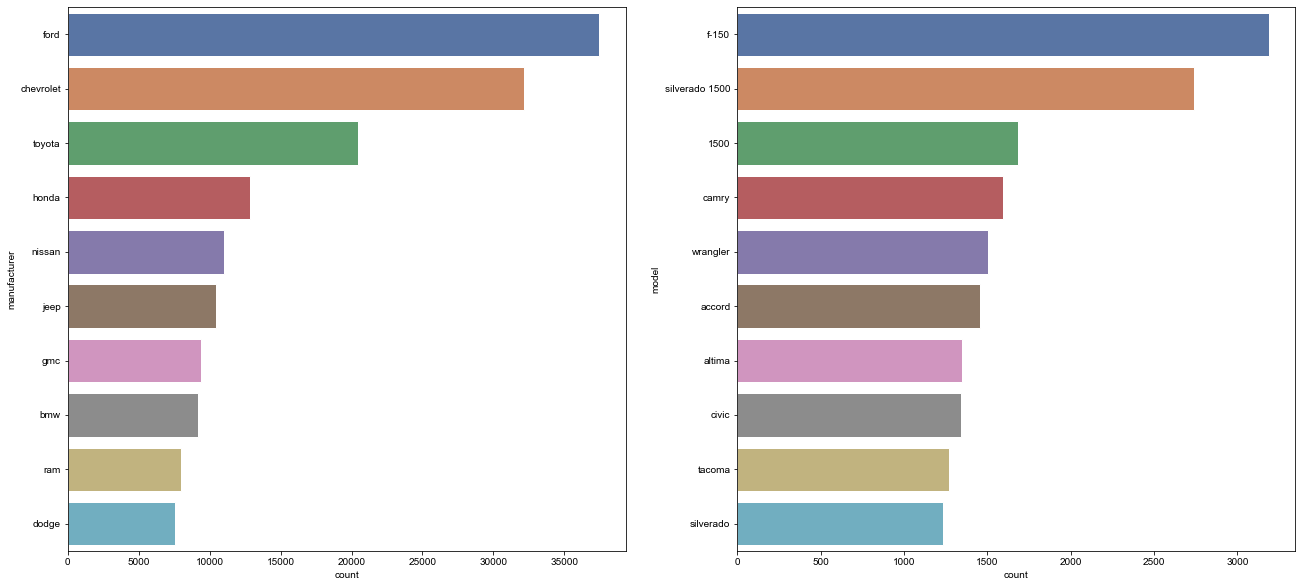

In [20]:
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':13})
sns.countplot(y ='model',data = used_cars_df_nonull,order=used_cars_df_nonull.model.value_counts().iloc[:10].index, ax = ax[1]) 
sns.countplot(y ='manufacturer',data = used_cars_df_nonull,order=used_cars_df_nonull.manufacturer.value_counts().iloc[:10].index, ax= ax[0])

<AxesSubplot:xlabel='transmission', ylabel='count'>

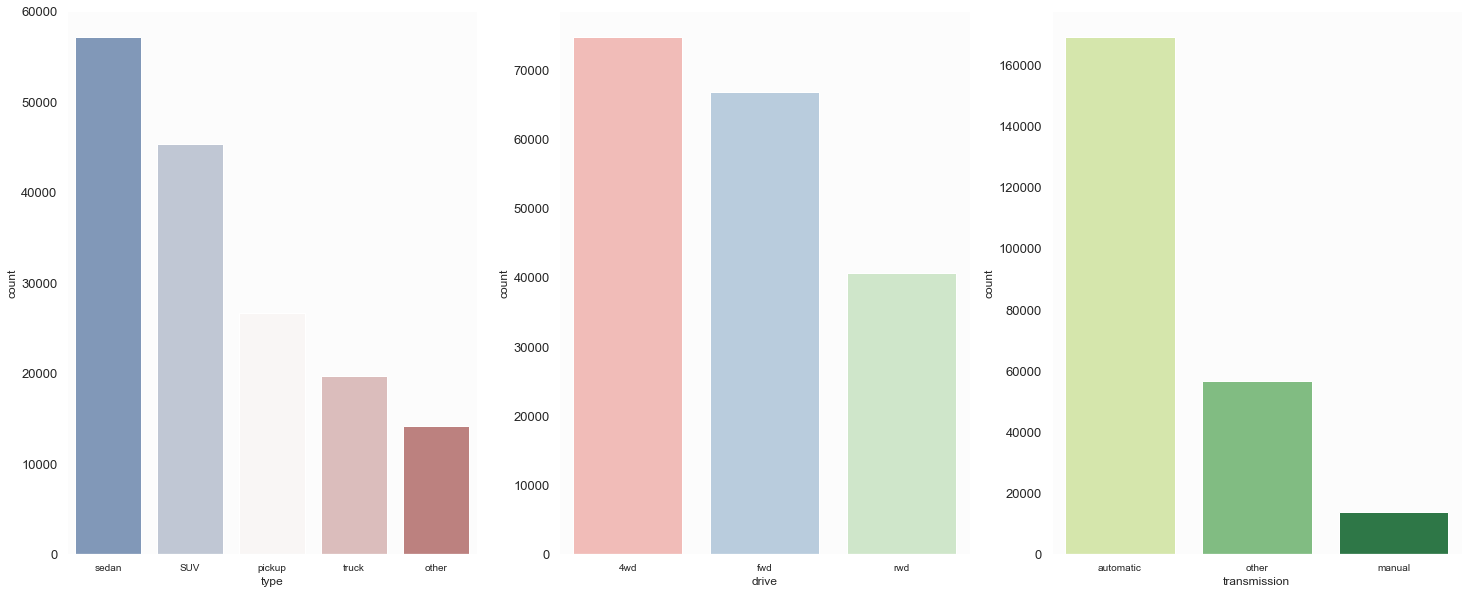

In [21]:
fig, ax =plt.subplots(1,3, figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='type',data = used_cars_df_nonull,order=used_cars_df_nonull.type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='drive',data = used_cars_df_nonull,order=used_cars_df_nonull.drive.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = used_cars_df_nonull,order=used_cars_df_nonull.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")

To better visualize this, and taking advantage of the already created Manufacturers DataFrames, we know arrange each of them by the most popular models adverstised.

In [22]:
model = ford_df['model'].value_counts()
ford_model = model.iloc[0:10]
df1 = ford_model.to_frame()
df1['manufacturer'] = 'ford'

model = chevrolet_df['model'].value_counts()
chevrolet_model = model.iloc[0:10]
df2 = chevrolet_model.to_frame()
df2['manufacturer'] = 'chevrolet'

model = toyota_df['model'].value_counts()
toyota_model = model.iloc[0:10]
df3 = toyota_model.to_frame()
df3['manufacturer'] = 'toyota'

model = honda_df['model'].value_counts()
honda_model = model.iloc[0:10]
df4 = honda_model.to_frame()
df4['manufacturer'] = 'honda'

model = nissan_df['model'].value_counts()
nissan_model = model.iloc[0:10]
df5 = nissan_model.to_frame()
df5['manufacturer'] = 'nissan'

model = jeep_df['model'].value_counts()
jeep_model = model.iloc[0:10]
df6 = jeep_model.to_frame()
df6['manufacturer'] = 'jeep'

model = gmc_df['model'].value_counts()
gmc_model = model.iloc[0:10]
df7 = gmc_model.to_frame()
df7['manufacturer'] = 'gmc'

model = bmw_df['model'].value_counts()
bmw_model = model.iloc[0:10]
df8 = bmw_model.to_frame()
df8['manufacturer'] = 'bmw'

model = ram_df['model'].value_counts()
ram_model = model.iloc[0:10]
df9 = ram_model.to_frame()
df9['manufacturer'] = 'ram'

model = dodge_df['model'].value_counts()
dodge_model = model.iloc[0:10]
df10 = dodge_model.to_frame()
df10['manufacturer'] = 'dodge'

model = mercedes_df['model'].value_counts()
mercedes_model = model.iloc[0:10]
df11 = mercedes_model.to_frame()
df11['manufacturer'] = 'mercedes-benz'

model = vw_df['model'].value_counts()
vw_model = model.iloc[0:10]
df12 = vw_model.to_frame()
df12['manufacturer'] = 'volkswagen'

model = audi_df['model'].value_counts()
audi_model = model.iloc[0:10]
df13 = audi_model.to_frame()
df13['manufacturer'] = 'audi'

model = kia_df['model'].value_counts()
kia_model = model.iloc[0:10]
df14 = kia_model.to_frame()
df14['manufacturer'] = 'kia'

model = chrysler_df['model'].value_counts()
chrysler_model = model.iloc[0:10]
df15 = chrysler_model.to_frame()
df15['manufacturer'] = 'chrysler'

model_df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]
concat_model = pd.concat(model_df)

concat_model = concat_model.reset_index()
model_count_df = concat_model.rename(columns ={'index': 'Model', 
                                               'model': 'Count', 
                                               'manufacturer': 'Manufacturer'})

As expected, the top 10 models were going to be from the most popularly advertised Manufacturer, Ford.

In [23]:
model_count_df.head(10)

,Model,Count,Manufacturer
0,f-150,3189,ford
1,mustang,1176,ford
2,escape,1082,ford
3,explorer,1008,ford
4,focus,858,ford
5,fusion,785,ford
6,f150,663,ford
7,fusion se,505,ford
8,ranger,496,ford
9,expedition,489,ford


if we try to Analyze metrics and measures of central tendency this way, it will be impossible to quickly visualize the most popularly sold used models for the Manufacturers at the bottom. The best option is to build a chart that showcases both the spread of manufacturers and models at the same time.

In [24]:
fig =px.sunburst(
    model_count_df,path=['Manufacturer','Model'],values='Count', color='Manufacturer'
                  )
fig.update_layout(margin=dict(t=1, b=1, r=1, l=1))
fig.show()

In [25]:
used_cars_df_nonull.drop(used_cars_df_nonull[used_cars_df_nonull.price > 150000].index, inplace = True)

C:\Users\c_hum\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



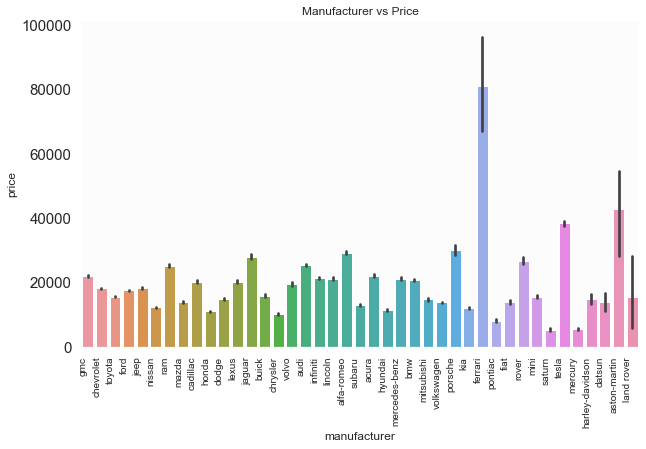

In [26]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=used_cars_df_nonull);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);
plt.title("Manufacturer vs Price");

Now knowing that Ford is clearly the dominant manufacturer in the second hand vehicules market. Let's visualize the main consumers by state in the US.

In [27]:
ford_map_df = ford_df.rename(columns = {'lat': 'latitude', 'long': 'longitude'})

In [28]:
ford_map_df = chevrolet_df.rename(columns = {'lat': 'latitude', 'long': 'longitude'})
ford_map_df.latitude.fillna(0, inplace = True)
ford_map_df.longitude.fillna(0, inplace = True) 

In [29]:
locations = ford_map_df[['latitude', 'longitude']]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, dissipating = False, 
                                 max_intensity = 1000, point_radius = 3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Vehicle Type Exploratory Data Analysis 

First, we identify all the vehicule types in our DataFrame.

In [30]:
used_cars_df_nonull['type'].value_counts()

sedan          57205
SUV            45302
pickup         26672
truck          19691
other          14149
coupe          13772
hatchback      12299
wagon           6156
convertible     5253
van             5085
mini-van        3697
offroad          543
bus              238
Name: type, dtype: int64

To better visualize our distribution, we plot our value counts.

Text(0, 0.5, 'Count')

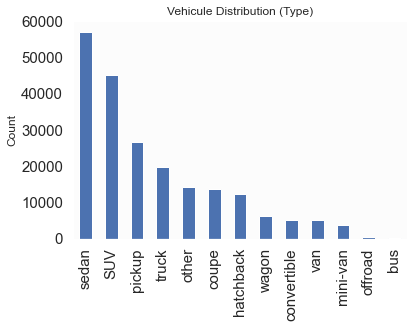

In [31]:
used_cars_df_nonull.type.value_counts().plot(kind = 'bar')
plt.title('Vehicule Distribution (Type)')
plt.ylabel('Count')

Based on this, we are going to focus on the most common vehicule types for the analysis, making some exclusions. Our scope will be:
- Sedan
- SUV's
- Pickup
- Coupe
- Hatchback

In [32]:
#Creating Individual Dataframes for every vehicle type
sedan_df = used_cars_df_nonull[used_cars_df_nonull['type'] == 'sedan']
SUV_df = used_cars_df_nonull[used_cars_df_nonull['type'] == 'SUV']
pickup_df = used_cars_df_nonull[used_cars_df_nonull['type'] == 'pickup']
coupe_df = used_cars_df_nonull[used_cars_df_nonull['type'] == 'coupe']
hb_df = used_cars_df_nonull[used_cars_df_nonull['type'] == 'hatchback']

After creating our DataFrames, using our previously defined function, we get rid of the outliers.

In [33]:
remove_outliers(sedan_df, columns, 2)
remove_outliers(SUV_df, columns, 2)
remove_outliers(pickup_df, columns, 2)
remove_outliers(coupe_df, columns, 2)
remove_outliers(hb_df, columns, 2)

Working on column: price
Working on column: odometer
Working on column: year
Working on column: price
Working on column: odometer
Working on column: year
Working on column: price
Working on column: odometer
Working on column: year
Working on column: price
Working on column: odometer
Working on column: year
Working on column: price
Working on column: odometer
Working on column: year


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age
54,7314584291,auburn,31590,2019.0,cadillac,xt4 sport suv 4d,good,NaN,other,12102.0,clean,other,fwd,hatchback,black,al,32.590000,-85.480000,2021-04-29T18:11:08-0500,1.0
82,7310905283,auburn,25990,2015.0,lexus,nx 300h sport utility 4d,good,NaN,other,55783.0,clean,other,NaN,hatchback,white,al,32.590000,-85.480000,2021-04-22T11:51:00-0500,5.0
85,7310798664,auburn,34990,2020.0,lexus,nx 300 sport utility 4d,good,NaN,gas,1722.0,clean,other,fwd,hatchback,black,al,32.590000,-85.480000,2021-04-22T08:51:28-0500,0.0
94,7309828053,auburn,29990,2018.0,alfa-romeo,romeo stelvio ti sport,good,NaN,other,26978.0,clean,other,NaN,hatchback,NaN,al,32.590000,-85.480000,2021-04-20T10:41:04-0500,2.0
95,7309798041,auburn,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,hatchback,NaN,al,32.547500,-85.468200,2021-04-20T09:55:48-0500,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426757,7303530897,wyoming,14990,2015.0,nissan,leaf sv hatchback 4d,good,NaN,electric,26816.0,clean,other,fwd,hatchback,white,wy,33.786500,-84.445400,2021-04-08T03:21:00-0600,5.0
426796,7303008220,wyoming,16990,2017.0,chevrolet,trax lt sport utility,good,NaN,gas,37448.0,clean,other,NaN,hatchback,white,wy,33.786500,-84.445400,2021-04-07T03:30:19-0600,3.0
426801,7303005002,wyoming,14990,2017.0,chevrolet,trax ls sport utility,good,NaN,other,58617.0,clean,other,fwd,hatchback,blue,wy,33.786500,-84.445400,2021-04-07T02:40:31-0600,3.0
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,hatchback,red,wy,41.143700,-104.796200,2021-04-05T18:10:52-0600,35.0


In [34]:
sedan_avg_price = sedan_df.groupby(['year']).mean()['price']

In [35]:
sedan_avg_price = sedan_df.groupby(['year']).mean()['price']
sedan_avg_price

year
1924.0    22000.000000
1927.0    11500.000000
1928.0    29271.428571
1929.0    21975.000000
1930.0    18880.000000
              ...     
2017.0    19851.600474
2018.0    23933.222827
2019.0    26066.865821
2020.0    30241.508333
2021.0    14764.649485
Name: price, Length: 93, dtype: float64

In [36]:
sedan_avg_year = sedan_df.groupby(['price']).mean()['year']

# Depreciation

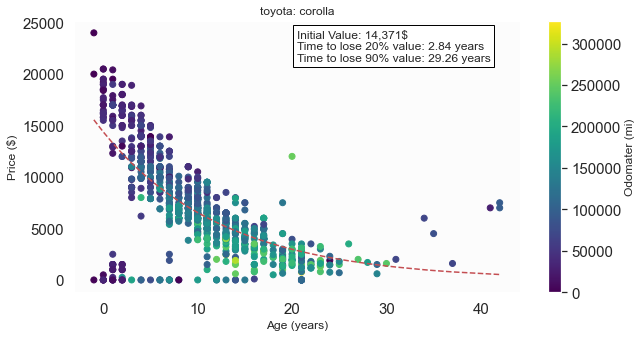

In [43]:
#fit an exponential to the toyota corolla data to determine how well it holds its value
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(-b*x)#exponential function we will use to fit

def plot_depr(data, func, model):
    #get model data and filter out cars older than 50 years
    df = data[(data['make_model']==model) & (data['age']<=50)].sort_values(by='age')
    xdata = df['age']
    ydata = df['price']
    
    #fit to the data
    popt, _ = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])#fit the exponential to the data
    init = popt[0]#intiial value (age=0) according to the curve fit
    depr20 = -np.log(0.80)/popt[1]#time to depreciate 20% according to the curve fit
    depr90 = -np.log(0.10)/popt[1]#time to depreciate 90% according to the curve fit
    
    fig, ax = plt.subplots(figsize=(10,5))
    carplt = ax.scatter(xdata, ydata, c=df['odometer'], cmap='viridis')#scatter plot of age vs price, colored by odometer    
    plt.plot(xdata, func(xdata, *popt), 'r--')#plot the fitted curve
    
    plt.text(0.5, 0.85, 
             'Initial Value: {:,.0f}$\n'
             'Time to lose 20% value: {:.2f} years\n'
             'Time to lose 90% value: {:.2f} years'.format(init, depr20, depr90),
             transform = ax.transAxes, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    cbar=plt.colorbar(carplt)
    cbar.set_label('Odomater (mi)')
    plt.xlabel('Age (years)')
    plt.ylabel('Price ($)')
    plt.title(model)
    plt.show()
    
plot_depr(used_cars_df_nonull, func, 'toyota: corolla')

C:\Users\c_hum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



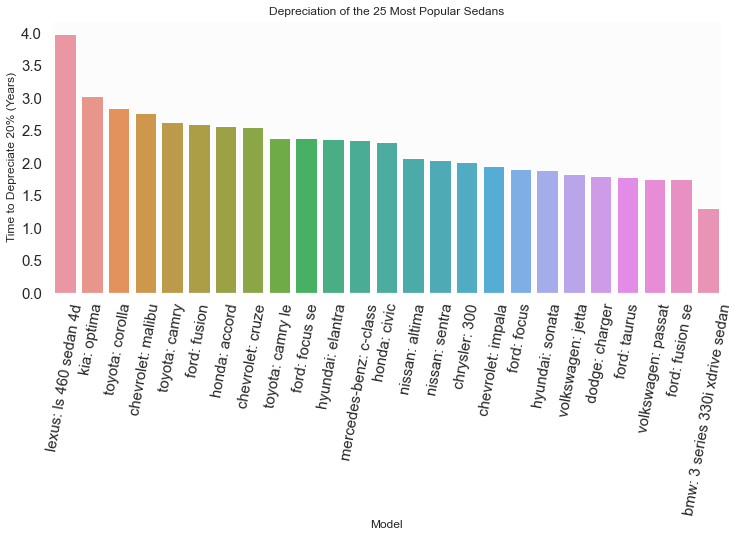

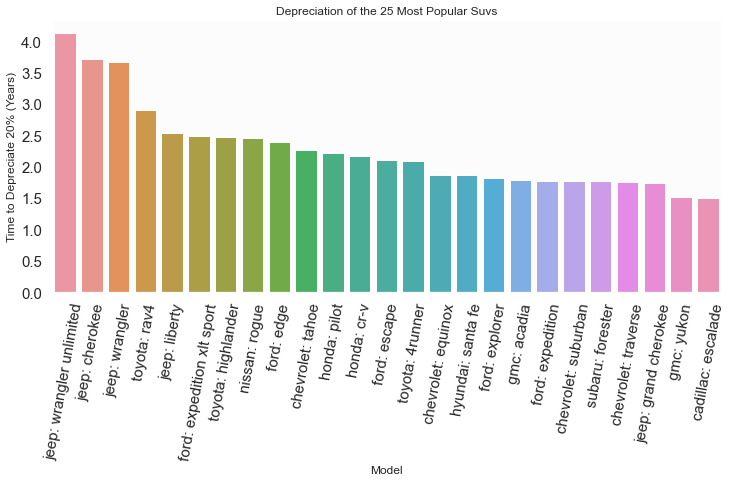

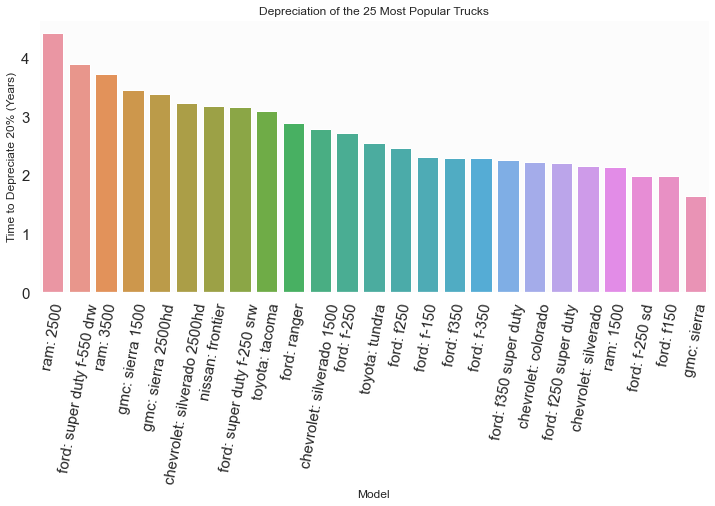

In [44]:
used_cars_df_nonull['make_model'] = used_cars_df_nonull['manufacturer'] + ': ' + used_cars_df_nonull['model']
#run curve fits for the 25 most popular sedans, SUVs, and trucks and plot
for kind in ['sedan', 'SUV', 'truck']:#loop over the type of vehicle
    com = used_cars_df_nonull[used_cars_df_nonull['type']==kind].make_model.value_counts()[0:25].index #25 most popular models of this type
    depr_df = pd.DataFrame(columns={'Model', 'val0', 'depr20', 'depr90'}) #initialize an empty dataframe to hold the data
    for name in com:#loop over the models
        df = used_cars_df_nonull[(used_cars_df_nonull['make_model']==name) & (used_cars_df_nonull['age']<=50)].sort_values(by='age')
        xdata = df['age']
        ydata = df['price']  
        popt, pcov = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])

        init = popt[0]
        depr20 = -np.log(0.80)/popt[1]
        depr90 = -np.log(0.10)/popt[1]
        depr_df = depr_df.append({'Model':name, 'val0':init, 'depr20':depr20, 'depr90':depr90}, ignore_index=True)

    depr_df = depr_df.sort_values(by='depr20', ascending=False)

    fig, ax = plt.subplots(figsize=(12,5))
    sns.barplot(data=depr_df, x='Model', y='depr20', ax=ax)
    plt.title('Depreciation of the 25 Most Popular {}s'.format(kind.capitalize()))
    plt.ylabel('Time to Depreciate 20% (Years)')
    plt.xticks(rotation = 80)
    plt.show()

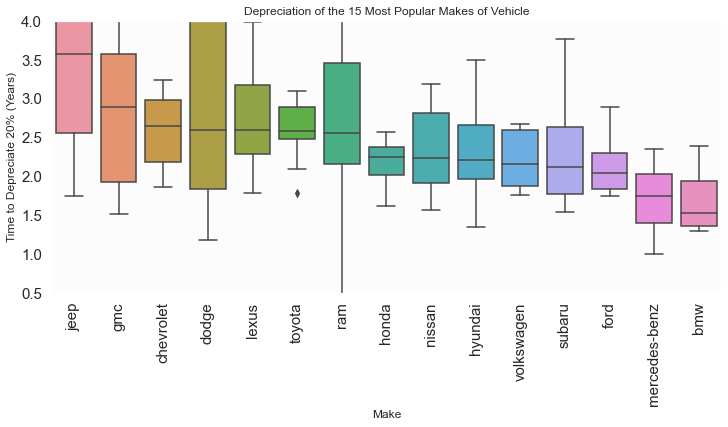

In [45]:
#Boxplot of deprecition for different manufactureers
makes = used_cars_df_nonull['manufacturer'].value_counts()[:15].index#15 most popular manufacturers
depr_df = pd.DataFrame(columns={'Make', 'Model', 'val0', 'depr20', 'depr90'})#this will hold the depreciation data
for make in makes:#loop over manufactureres
    com = used_cars_df_nonull[used_cars_df_nonull['manufacturer']==make].model.value_counts()[0:10].index #get the 10 most poopular models by the manufacturer
    for name in com:#look over the models
        df = used_cars_df_nonull[(used_cars_df_nonull['model']==name) & (used_cars_df_nonull['age']<50)].sort_values(by='age')#get data for the model for ages under 50
        xdata = df['age']
        ydata = df['price']  
        popt, pcov = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])#fit to the data

        init = popt[0]#initial value
        depr20 = -np.log(0.80)/popt[1]#time to depreciate 20%
        depr90 = -np.log(0.10)/popt[1]#time to depreciate 90%
        #append this data to the dataframe
        depr_df = depr_df.append({'Make':make, 'Model':name, 'val0':init, 'depr20':depr20, 'depr90':depr90}, ignore_index=True)

#order the data in terms of decreasing median depreciation time
order = depr_df.groupby('Make')['depr20'].median().sort_values(ascending=False).index

fig, ax=plt.subplots(figsize=(12,5))
sns.boxplot(data=depr_df, x='Make', y='depr20', order=order)
plt.title('Depreciation of the 15 Most Popular Makes of Vehicle')
plt.ylabel('Time to Depreciate 20% (Years)')
plt.ylim(0.5,4)
plt.xticks(rotation=90)
plt.show()